In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
import re


In [ ]:
csvfile = '/content/water_potability (1).csv'       # while reading the data the compiler was not able to decode the utf-8 so we changed the encoding
data_all = pd.read_csv(csvfile , encoding = 'latin-1' )

In [ ]:
data_all.head()     # this is how our data looks like

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [ ]:
data_all.shape   # shape of our data

(3276, 10)

In [ ]:
data_all['Potability'].value_counts()    # potability is our target column


Potability
0    2938
1     338
Name: count, dtype: int64

In [ ]:

338/data_all.shape[0]                  # it has class imbalance of around 90 /10

0.10317460317460317

In [ ]:
# EDA
data_all.head()                  # if we look at the data we can see that all the columns should numeric in nature


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [ ]:
data_all.info()        # ph , hardness , solids , chloramines  , conductivity , organic carbon ,Trihalomethanes and turbidity should be numeric in nature but
                       # there should be some probllem with it as it is coming out to object column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [ ]:
data_all.isna().sum()  #as we can see there are 3 columns which contains nul values
                        # ph , sulphate and trihalomethanes
                        # we have to do null value treatment

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# preprocessing
# we have to do null value treatment
# find the values which are causing issues with the numeric column and change it into object column



In [ ]:
def non_numeric(column):
  non_numeric_elements = []
  for i in column:
    try:
      float(i)
    except:
      non_numeric_elements.append(i)
  return non_numeric_elements


In [ ]:
column_list = ['ph','Hardness','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

for col in column_list:
  non_numeric_elements1 = non_numeric(data_all[col])
  print('*********')
  print(col)
  print(non_numeric_elements1)
  print('no of values' , len(non_numeric_elements1))


# there are many vlues which includes special character and string values we have to treat it

*********
ph
['7.-.160467231']
no of values 1
*********
Hardness
['214.496610%457156', "20''9.609618"]
no of values 2
*********
Chloramines
['2.39798!499', '2.10269!09!91']
no of values 2
*********
Conductivity
['52,,,3.6712975', '323.794---624']
no of values 2
*********
Organic_carbon
[' ¥12.38 ', ' ¥11.12 ', ' ¥14.93 ', ' ¥13.35 ', ' ¥11.35 ', ' ¥16.05 ', ' ¥17.29 ', ' ¥9.80 ', ' ¥9.00 ', ' ¥14.08 ', ' ¥18.70 ', ' ¥15.77 ', ' ¥13.93 ', ' ¥9.71 ', ' ¥14.57 ', ' ¥16.25 ', ' ¥8.99 ', ' ¥15.61 ', ' ¥18.10 ', ' ¥11.53 ', ' ¥12.26 ', ' ¥9.83 ', ' ¥7.51 ', ' ¥13.86 ', ' ¥15.97 ', ' ¥9.35 ', ' ¥13.55 ', ' ¥11.87 ', ' ¥9.23 ', ' ¥19.27 ', ' ¥16.15 ', ' ¥9.39 ', ' ¥15.84 ', ' ¥10.66 ', ' ¥14.86 ', ' ¥13.64 ', ' ¥10.21 ', ' ¥13.48 ', ' ¥18.15 ', ' ¥21.85 ', ' ¥17.70 ', ' ¥13.17 ', ' ¥17.08 ', ' ¥11.62 ', ' ¥7.94 ', ' ¥14.64 ', ' ¥17.21 ', ' ¥14.17 ', ' ¥6.06 ', ' ¥17.49 ', ' ¥18.21 ', ' ¥16.83 ', ' ¥13.45 ', ' ¥17.15 ', ' ¥16.13 ', ' ¥13.37 ', ' ¥14.67 ', ' ¥18.40 ', ' ¥18.60 ', ' ¥9.58 ', ' ¥1

In [ ]:
data_all.loc[data_all['ph']=='7.-.160467231','ph'] = 7.160467231
data_all.loc[data_all['Hardness']=='214.496610%457156','Hardness'] = 214.496610457156
data_all.loc[data_all['Hardness']=="20''9.609618",'Hardness'] = 209.609618


# we have treated the oject values of ph and hardness



In [ ]:
data_all.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [ ]:
def object_to_float(s):
  ''' This script defines a function called convert_to_float, which first cleans the string by using re.sub/
   to remove any characters other than digits or dots, and then transforms it back to a float. '''

  empty_string = ''

    # Attempt to clean the string
  try:
      empty_string = re.sub(r'[^\d.]', '', s)
  except Exception as e:
        print(f"Error cleaning string: {e}")

  return float(empty_string) if empty_string else None

#Apply the conversion function to the specified column
column_list = ['Hardness','Chloramines','Conductivity','Organic_carbon','Turbidity']
for col in column_list:
  data_all[col] = data_all[col].apply(lambda x: object_to_float(x))
  print('******')
  print(col)
  print(data_all[col])

Error cleaning string: expected string or bytes-like object
Error cleaning string: expected string or bytes-like object
******
Hardness
0       204.890456
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681736
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64
******
Chloramines
0       7.300212
1       6.635246
2       9.275884
3       8.059332
4       6.546600
          ...   
3271    7.166639
3272    8.061362
3273    7.350233
3274    6.303357
3275    7.509306
Name: Chloramines, Length: 3276, dtype: float64
******
Conductivity
0       564.308654
1       592.885359
2       418.606213
3       363.266516
4       398.410813
           ...    
3271    526.424171
3272    392.449580
3273    432.044783
3274    402.883113
3275    327.459761
Name: Conductivity, Length: 3276, dtype: float64
******
Organic_carbon
0       10.379783
1       15.180013
2       16.868637
3 

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3274 non-null   float64
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 256.1+ KB


In [ ]:
def convert_to_float(s):
    if pd.isnull(s) or not isinstance(s, str):
        return None

    # Remove non-digit and non-dot characters
    cleaned_string = re.sub(r'[^\d.]', '', s)

    #print(f"Original: {s}, Cleaned: {cleaned_string}")

    # Convert to float
    try:
        return float(cleaned_string)
    except ValueError:
        return None
data_column = ['Solids','ph','Trihalomethanes']
for col in data_column:
# Apply the conversion function to each column in data_column

  data_all[col] = data_all[col].apply(lambda x: convert_to_float(x))
#data_all['Solids'] = data_all['Solids'].apply(lambda x: convert_to_float(x))

# Print the DataFrame with converted values
  print(data_all[col])
  print('**********************************')

0       20791.31898
1       18630.05786
2       19909.54173
3       22018.41744
4       17978.98634
           ...     
3271    47580.99160
3272    17329.80216
3273    33155.57822
3274    11983.86938
3275    17404.17706
Name: Solids, Length: 3276, dtype: float64
**********************************
0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64
**********************************
0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272           NaN
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64
**********************************


In [ ]:
data_all.info()                 # changed to datatype of columns object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3274 non-null   float64
 2   Solids           3275 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# null value treatement
data_all.isnull().sum()


ph                 492
Hardness             2
Solids               1
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data_all['ph'].describe()

count    2784.000000
mean        7.080766
std         1.594605
min         0.000000
25%         6.092665
50%         7.035894
75%         8.062251
max        14.000000
Name: ph, dtype: float64

In [ ]:
# checking skewness
data_all.skew()                # 3 features has skewness majorly chloramines organic_carbon and solids

ph                  0.025680
Hardness           -0.038535
Solids              0.621175
Chloramines        57.229356
Sulfate            -0.035947
Conductivity        0.264490
Organic_carbon     52.420198
Trihalomethanes    -0.083031
Turbidity          -0.007817
Potability          2.610286
dtype: float64

<ipython-input-26-bc38baf7ffd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Solids'])


<Axes: xlabel='Solids', ylabel='Density'>

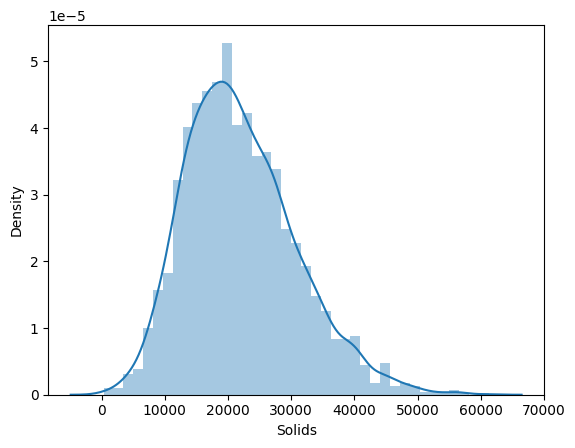

In [ ]:
sns.distplot(data_all['Solids'])

<ipython-input-27-7118fc3643da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Chloramines'])


<Axes: xlabel='Chloramines', ylabel='Density'>

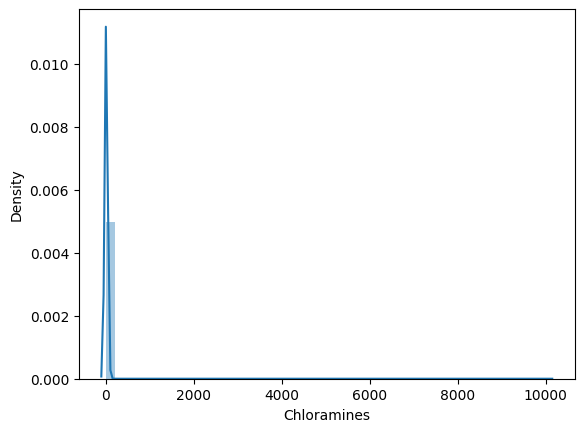

In [ ]:
sns.distplot(data_all['Chloramines'])


<ipython-input-28-a1f99fcfdda3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Organic_carbon'])


<Axes: xlabel='Organic_carbon', ylabel='Density'>

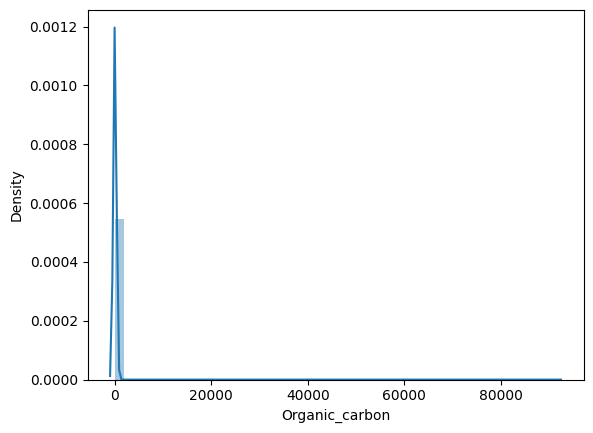

In [ ]:
sns.distplot(data_all['Organic_carbon'])

In [ ]:
sns.heatmap(data_all[column_list1].corr())

NameError: name 'column_list1' is not defined

In [ ]:
data_all[column_list1].corr()


In [ ]:
column_list1=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [ ]:
data_all.loc[data_all['ph'].isna(),'ph'] = np.mean(data_all['ph'])
   # changing the null to mean values bcz data is almost normally distributed

In [ ]:
data_all.loc[data_all['Hardness'].isna(), 'Hardness'] = np.mean(data_all['Hardness'])
     # changing the null to mean values bcz data is almost normally distributed


In [ ]:
data_all['Solids'].describe()

count     3275.000000
mean     22015.542139
std       8769.517230
min        320.942611
25%      15665.106980
50%      20933.512750
75%      27334.162290
max      61227.196010
Name: Solids, dtype: float64

In [ ]:
data_all.loc[data_all['Solids'].isna(),'Solids'] =21200
    # changing the null value to 21200 because there is siome little skewness

In [ ]:
data_all.loc[data_all['Sulfate'].isna(),'Sulfate'] = np.mean(data_all['Sulfate'])
      # changing the null to mean values bcz data is almost normally distributed

In [ ]:
data_all.loc[data_all['Trihalomethanes'].isna(),'Trihalomethanes'] = np.mean(data_all['Trihalomethanes'])
      # changing the null to mean values bcz data is almost normally distributed

In [ ]:
data_all.info()
 # all the null value has been treated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3274 non-null   float64
 2   Solids           3275 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data_all.skew()

ph                  0.027854
Hardness           -0.038535
Solids              0.621175
Chloramines        57.229356
Sulfate            -0.035947
Conductivity        0.264490
Organic_carbon     52.420198
Trihalomethanes    -0.083031
Turbidity          -0.007817
Potability          2.610286
dtype: float64

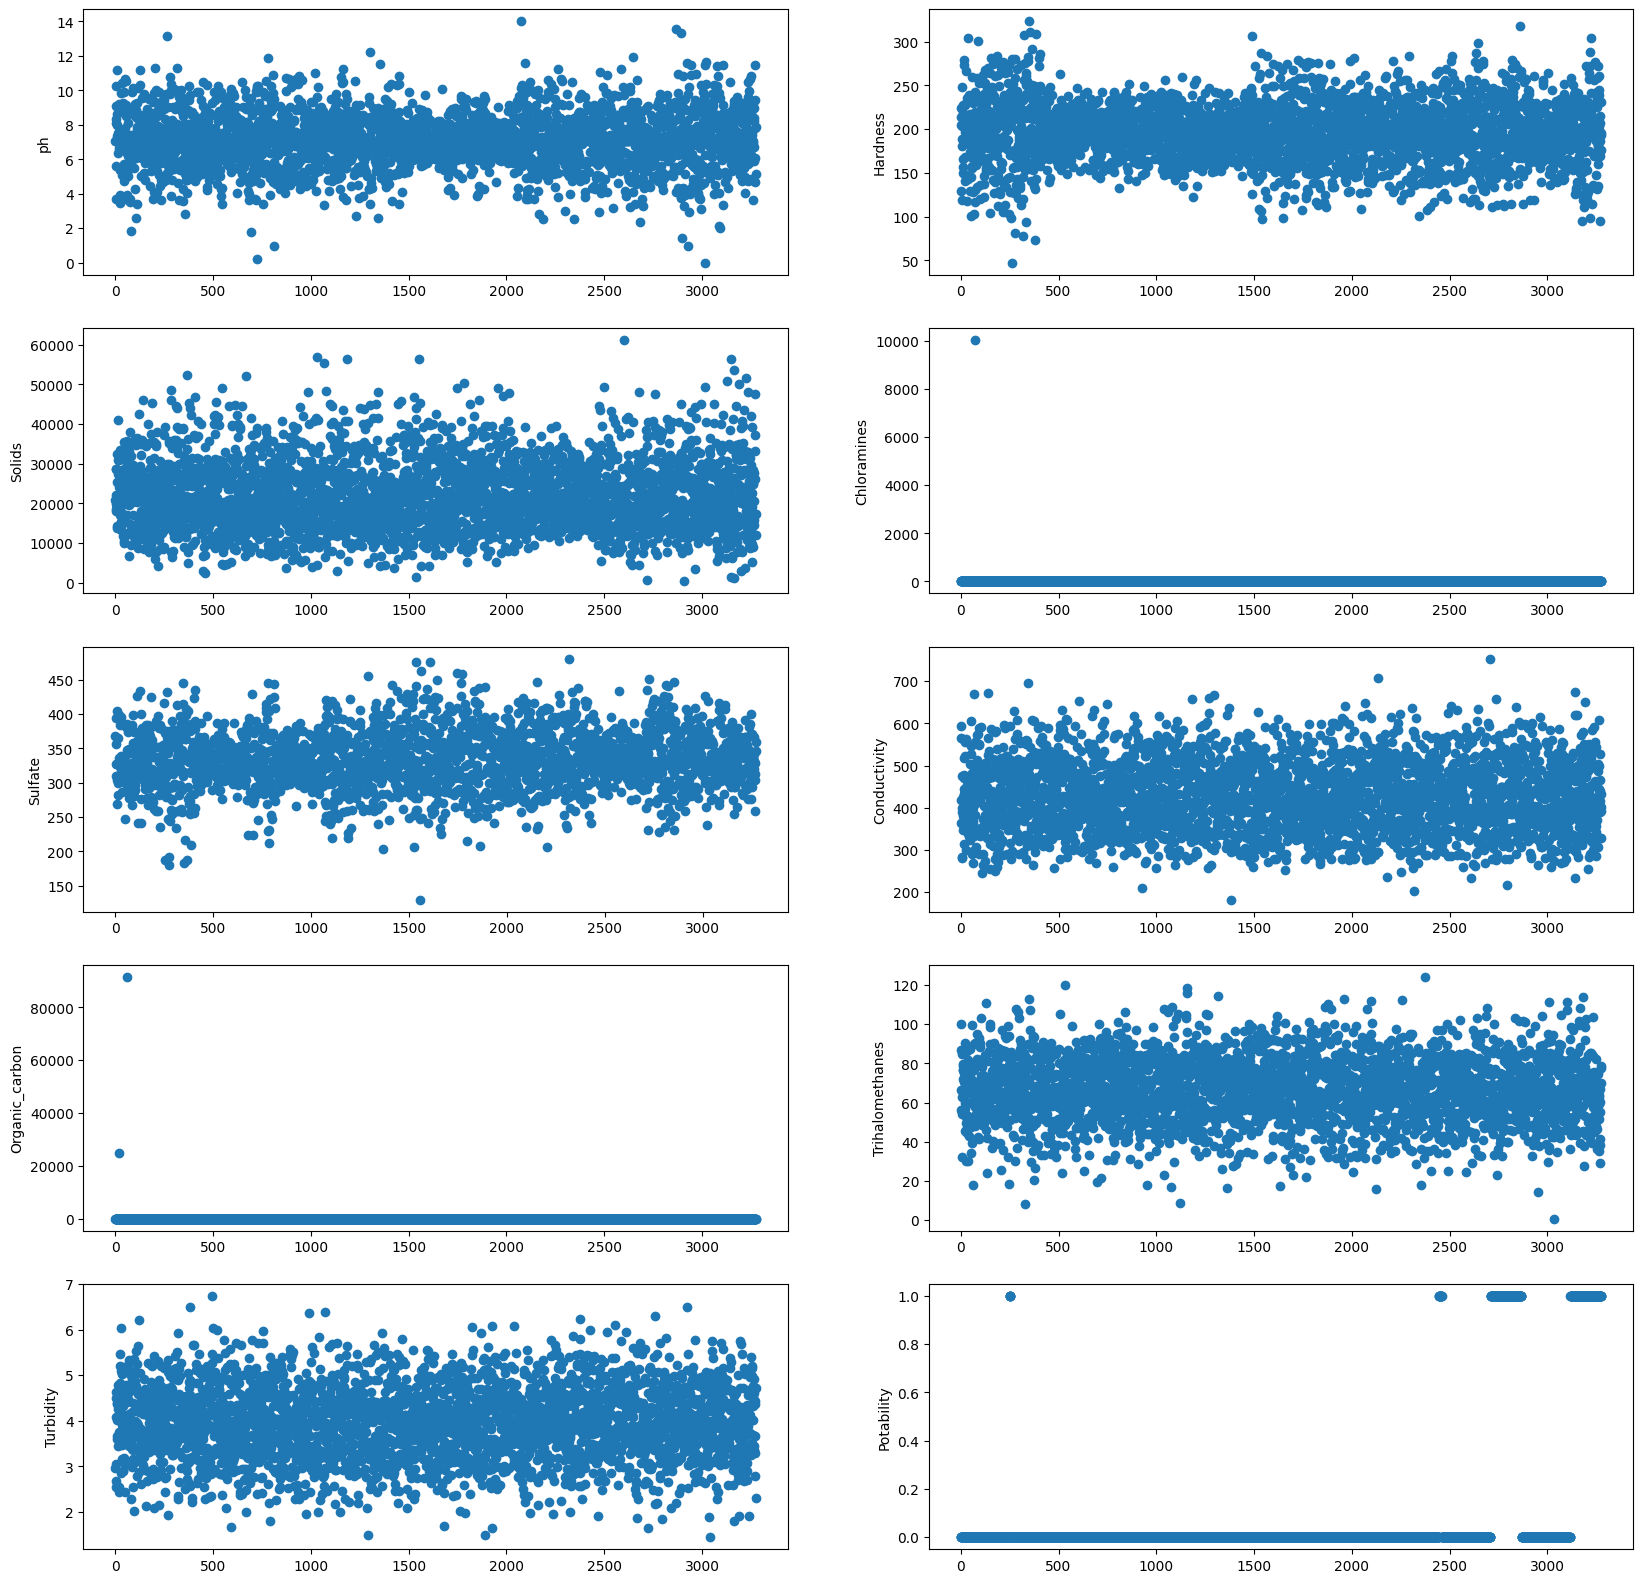

In [ ]:
from matplotlib import pyplot as plt

numeric_cols = data_all.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [ ]:
# two columns has outliers
#1 organic_carbon
#2 chloramines
# as we have seen above these two columns were right skewed also
# and the needs to be scaled also

In [ ]:
#outliers treatment
data_all.loc[data_all['Organic_carbon']>2000 , 'Organic_carbon'] = 16.560201   #changing it to 75th percentile


In [ ]:
data_all['Organic_carbon'].describe()

In [ ]:
data_all.loc[data_all['Chloramines']>2000 , 'Chloramines'] = 8.115458  #changing it to 75th percentile

In [ ]:
data_all['Chloramines'].describe()

In [ ]:
data_all.skew()
                                             # there is little bit skewness in some columns , lets treat in next iteration


In [ ]:
data_all.head(20)        # the data is quite sorted now

In [ ]:
sns.distplot(data_all['Solids'])

In [ ]:
sns.distplot(np.sqrt(data_all['Solids']))

In [ ]:
sns.distplot(data_all['Organic_carbon'])

In [ ]:
sns.heatmap(numeric_cols.corr())

In [ ]:
np.sqrt(data_all['Solids']).skew()

In [ ]:
data_all['Solids'] = np.sqrt(data_all['Solids'])

In [ ]:
sns.distplot(data_all['Conductivity'])

In [ ]:
sns.distplot(np.sqrt(data_all['Conductivity']))

In [ ]:
np.sqrt(data_all['Conductivity']).skew()

In [ ]:
data_all['Conductivity'] = np.sqrt(data_all['Conductivity'])



In [ ]:
sns.distplot(np.sqrt(data_all['Organic_carbon']))

In [ ]:
data_all.skew()


In [ ]:
# checking correlation
data_all.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075665,-0.082064,-0.016646,0.016638,0.017191,-0.029751,0.003063,-0.036220,-0.002382
Hardness,0.075665,1.000000,-0.047206,-0.042822,-0.106941,-0.023817,0.029858,-0.013005,-0.014188,-0.007354
Solids,-0.082064,-0.047206,1.000000,0.021709,-0.171844,0.013928,0.020563,-0.009245,0.019732,0.021515
Chloramines,-0.016646,-0.042822,0.021709,1.000000,-0.017531,0.016718,-0.000449,-0.020074,0.004293,-0.005668
Sulfate,0.016638,-0.106941,-0.171844,-0.017531,1.000000,-0.016121,0.015089,-0.030274,-0.011187,0.021123
Conductivity,0.017191,-0.023817,0.013928,0.016718,-0.016121,1.000000,-0.029708,0.001285,0.005798,0.014311
Organic_carbon,-0.029751,0.029858,0.020563,-0.000449,0.015089,-0.029708,1.000000,-0.001384,0.001734,-0.007307
Trihalomethanes,0.003063,-0.013005,-0.009245,-0.020074,-0.030274,0.001285,-0.001384,1.000000,-0.022145,-0.021134
Turbidity,-0.036220,-0.014188,0.019732,0.004293,-0.011187,0.005798,0.001734,-0.022145,1.000000,-0.016321
Potability,-0.002382,-0.007354,0.021515,-0.005668,0.021123,0.014311,-0.007307,-0.021134,-0.016321,1.000000


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
column_names.remove('Potability')
sc = StandardScaler()
sc.fit(data_all[column_names])
data_all[column_names] = sc.transform(data_all[column_names])

In [ ]:
feature_columns = data_all.drop(['Potability'] , axis =1 )
target_column = data_all['Potability']

In [ ]:
feature_columns.shape , target_column.shape

((3276, 9), (3276,))

In [ ]:
# modelling
# first divide the data into trainin and testing data

In [ ]:
from sklearn.model_selection import train_test_split
train_feature, test_feature , train_target , test_target = train_test_split(feature_columns,target_column,\
test_size = 0.2 , random_state = 1200 , stratify= target_column)

In [ ]:
train_feature.shape, test_feature.shape , train_target.shape , test_target.shape

((2620, 9), (656, 9), (2620,), (656,))

In [ ]:
train_target.value_counts()

Potability
0    2350
1     270
Name: count, dtype: int64

In [ ]:
test_target.value_counts()   # WE can see there is class imbalance in the data

Potability
0    588
1     68
Name: count, dtype: int64

In [ ]:
train_feature.reset_index(drop = True, inplace = True)
test_feature.reset_index(drop = True, inplace = True)
train_target.reset_index(drop = True, inplace = True)
test_target.reset_index(drop = True, inplace = True)

In [ ]:
# first iteration of logistic regression
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter = 500,
                              random_state = 8,
                              class_weight = {0:1,1:4})
LR_model.fit(train_feature,train_target)
# without scaling and skewness treatment
# with threshod of 0.3 ,  class_weight = {0:1,1:4} f1 score 18.9
#                         class_weight = {0:1,1:5} f1 score train is 18.3 and f1 score of test is improved from 0 to 17.5
#                         class_weight = {0:1,1:5.9} f1 score train is 18.69 and f1 score of test is improved from 17.5 to 18.62.
# with scaling skewness treatment
#                         class_weight = {0:1,1:5.9} f1 score train is 18.69 and f1 score of test is  18.62. no change

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
Prediction = pd.DataFrame(LR_model.predict_proba(train_feature))

In [ ]:
Prediction['Threshold'] = 0
Prediction.loc[Prediction[1]>=0.3,'Threshold'] = 1

In [ ]:
Prediction

In [ ]:
from sklearn.metrics import f1_score , confusion_matrix
f1_score(y_true=train_target, y_pred = Prediction['Threshold'])

In [ ]:
pd.DataFrame(confusion_matrix(y_true = train_target, y_pred = Prediction['Threshold'] ) , columns = ['Predict_0','Predict_1'] , index = ['Actual_0','Actual_1'])

In [ ]:
prediction_test = pd.DataFrame(LR_model.predict_proba(test_feature))

In [ ]:
prediction_test['Threshold']=0
prediction_test.loc[prediction_test[1]>=0.4,'Threshold'] = 1

In [ ]:
prediction_test


In [ ]:
f1_score(y_true=test_target, y_pred = prediction_test['Threshold'])

In [ ]:
train_rows = []
test_rows = []

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3) ## divide the entire data into 5 equal parts..each part is of 20% data

splits = kf.split(X=feature_columns, y=target_column) ## actual splitting happens

for train_index, test_index in splits:
  train_rows.append(list(train_index))
  test_rows.append(list(test_index))

In [ ]:
train_data = []
test_data = []

for train_index, test_index in zip(train_rows, test_rows):
    X_train, X_test = feature_columns.iloc[train_index], feature_columns.iloc[test_index]
    y_train, y_test = target_column.iloc[train_index], target_column.iloc[test_index]

    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

In [ ]:
first_fold_train_features, first_fold_train_target = train_data[0]
first_fold_val_features, first_fold_val_target = test_data[0]

Second_fold_train_features, Second_fold_train_target = train_data[1]
Second_fold_val_features, Second_fold_val_target = test_data[1]

third_fold_train_features, third_fold_train_target = train_data[2]
third_fold_val_features, third_fold_val_target = test_data[2]




In [ ]:
LR_model = LogisticRegression(max_iter = 400, random_state = 800,
                              class_weight = {0:1,1:5.6})
LR_model.fit(first_fold_train_features,first_fold_train_target)

In [ ]:
Prediction = pd.DataFrame(LR_model.predict_proba(first_fold_train_features))

In [ ]:
Prediction['Threshold'] = 0
Prediction.loc[Prediction[1]>=0.4,'Threshold'] = 1

In [ ]:
f1_score(y_true=first_fold_train_target, y_pred = Prediction['Threshold'])

In [ ]:
prediction_test = pd.DataFrame(LR_model.predict_proba(first_fold_val_features))

In [ ]:
prediction_test['Threshold'] = 0
prediction_test.loc[prediction_test[1]>=0.4,'Threshold'] = 1

In [ ]:
f1_score(y_true=first_fold_val_target, y_pred = prediction_test['Threshold'])

In [ ]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(Second_fold_train_features,Second_fold_train_target)

In [ ]:
prediction_train = pd.DataFrame(LR_model.predict_proba(Second_fold_train_features))
prediction_val = pd.DataFrame(LR_model.predict_proba(Second_fold_val_features))


In [ ]:
prediction_train['Thres'] = 0
prediction_train.loc[prediction_train[1]>=0.4,'Thres'] = 1
prediction_val['Thres'] = 0
prediction_val.loc[prediction_val[1]>=0.4,'Thres'] = 1

In [ ]:
print(f"f1 score for Second_fold_train {f1_score(y_true= Second_fold_train_target, y_pred = prediction_train['Thres'])}")
print(f"f1 score for Second_fold_val {f1_score(y_true= Second_fold_val_target, y_pred = prediction_val['Thres'])}")

In [ ]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(third_fold_train_features,third_fold_train_target)

In [ ]:
# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(  criterion='entropy' ,
                              class_weight={0:1,1:6},
                             max_depth = 6, min_samples_split = 10 , random_state=1200)
dtc.fit(train_feature,train_target)
#                       class_weight={0:1,1:5} with this f1 score train 43.3 and test is 20.1
#                         criterion='entropy'  with this f1 score train 43.3 and test is 16
#                       class_weight={0:1,1:6} with this f1 score train 43.3 and test is 15.6
#                         criterion='entropy'  with this f1 score train 43.3 and test is 16.5         conclusion = it dint get better at all
#                       now with threshold 0.4 and class_weight={0:1,1:5}f1 score train 31.5 and test is 21.5
#
#                       now with threshold 0.3 and class_weight={0:1,1:5}f1 score train 31.4 and test is 20.7
#                       now with threshold 0.4 and class_weight={0:1,1:6}f1 score train 31.2 and test is 20.9
#                       after using grid search cv max value f1 train test score is  55.9 and test is 20.0

In [ ]:
prediction = pd.DataFrame(dtc.predict(train_feature))

In [ ]:
prediction

In [ ]:
pd.DataFrame(confusion_matrix(y_true = train_target , y_pred = prediction) ,columns = ['Predict_0','Predict_1'] , index = ['Actual_0','Actual_1'])

In [ ]:
f1_score(y_true = train_target, y_pred = prediction)


In [ ]:

predict_test = pd.DataFrame(dtc.predict(test_feature))

In [ ]:
f1_score(y_true = test_target, y_pred = predict_test )


In [ ]:
predict_threshold = pd.DataFrame(dtc.predict_proba(train_feature))

In [ ]:
predict_threshold['Threshold'] = 0
predict_threshold.loc[predict_threshold[1]>=0.3,'Threshold'] = 1

In [ ]:
f1_score(y_true = train_target, y_pred = predict_threshold['Threshold'] )

In [ ]:
predict_threshold_test = pd.DataFrame(dtc.predict_proba(test_feature))

In [ ]:
predict_threshold_test['Threshold'] = 0
predict_threshold_test.loc[predict_threshold_test[1]>=0.3,'Threshold'] = 1

In [ ]:
f1_score(y_true = test_target, y_pred = predict_threshold_test['Threshold'] )


In [ ]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
params = { 'class_weight' : [{0:1,1:4.5},{0:1,1:5},{0:1,1:5.1},{0:1,1:5.3}],
          'max_depth' : [6,7,8,9,10],
           'min_samples_split' : [10,20,25]

           }
grid_search = GridSearchCV(estimator = dtc,           #class
                           param_grid = params,
                           cv=5,           #Kfold validation = 5 fold validation
                           scoring = 'f1',
                           return_train_score=True )
grid_search.fit(feature_columns,target_column)

In [ ]:
grid_search.cv_results_['mean_train_score']

In [ ]:
grid_search.cv_results_['mean_test_score']


In [ ]:
#ensemble technique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

lr_model =  LogisticRegression(max_iter=500)
svm_model = SVC()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

ensemble_model= VotingClassifier([('lr', lr_model),
                                  ('svm', svm_model),
                                  ('knn', knn_model),
                                  ('rf', rf_model),
                                  ('dt', dt_model)], voting='hard')

ensemble_model.fit(feature_columns, target_column)

In [ ]:
from sklearn.metrics import confusion_matrix
prediction = ensemble_model.predict(feature_columns)
actuals = target_column.tolist()



In [ ]:
confusion_matrix(actuals, prediction)

In [ ]:
f1_score(actuals, prediction)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train_feature, train_target.ravel())




In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
LR_model = LogisticRegression(max_iter = 400,                                  ## Model is overfitting with LR tried with 40%, 50%
                              class_weight = {0:1,1:1})
LR_model.fit(X_train_res,y_train_res)
#                        after using smote
#                                     the train  f1 score at {0:1,1:2} is 66.6 test is 18.7
#                                     the train  f1 score at {0:1,1:2} is 54.4 test is 20.1    # there was no change after channging the threshold also


In [ ]:
Prediction_smote = pd.DataFrame(LR_model.predict_proba(X_train_res))

In [ ]:
Prediction_smote['threshold']=0
Prediction_smote.loc[Prediction_smote[1]>=0.4,'threshold'] = 1

In [ ]:
Prediction_smote

In [ ]:
f1_score(y_true = y_train_res , y_pred =Prediction_smote['threshold'] )

In [ ]:
Prediction_test = pd.DataFrame(LR_model.predict_proba(test_feature))

In [ ]:
Prediction_test['threshold']=0
Prediction_test.loc[Prediction_test[1]>=0.4,'threshold'] = 1

In [ ]:
Prediction_test


In [ ]:
f1_score(y_true = test_target , y_pred =Prediction_test['threshold'] )

In [ ]:
clf = DecisionTreeClassifier(class_weight={0:1,1:1},
                             max_depth = 8, min_samples_split = 10 , random_state=8)
clf.fit(X_train_res,y_train_res)
#                            at threshold 0.3 and class_weight={0:1,1:3} test f1 score is 73.03 and test is 18.9
#                            at threshold 0.3 and class_weight={0:1,1:3} test f1 score is 80.5 and test is 19.6
#                            no change in test f1 score after varying max and everything although train f1 score reached to 75.5 at max depth 8
#                            and it was 75.6 at threshold of .5

In [ ]:
predict = pd.DataFrame(clf.predict_proba(X_train_res))

In [ ]:
predict['threshold'] = 0
predict.loc[predict[1]>=0.5,'threshold'] = 1

In [ ]:
predict


In [ ]:
print(f1_score(y_true= y_train_res, y_pred= predict['threshold']))

In [ ]:
predict_test = pd.DataFrame(clf.predict_proba(test_feature))

In [ ]:
predict_test

In [ ]:
predict_test['threshold'] = 0
predict_test.loc[predict[1]>=0.3,'threshold'] = 1

In [ ]:
print(f1_score(y_true= test_target, y_pred= predict_test['threshold']))